In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

In [2]:
df = pd.read_csv('https://stepik.org/media/attachments/lesson/387691/cars.csv')
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [5]:
df.isna().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [6]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [14]:
df['company'] = df['CarName'].str.split()
df['company'] = df['company'].apply(lambda x: x[0])
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,company
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [15]:
df['company'].value_counts()

toyota         31
nissan         17
mazda          15
honda          13
mitsubishi     13
subaru         12
peugeot        11
volvo          11
dodge           9
volkswagen      9
bmw             8
buick           8
audi            7
plymouth        7
saab            6
isuzu           4
porsche         4
jaguar          3
alfa-romero     3
chevrolet       3
renault         2
maxda           2
vw              2
mercury         1
porcshce        1
vokswagen       1
Nissan          1
toyouta         1
Name: company, dtype: int64

In [16]:
df['company'].nunique()

28

In [22]:
df['company'] = df['company'].str.replace('maxda', 'mazda')
df['company'] = df['company'].str.replace('Nissan', 'nissan')
df['company'] = df['company'].str.replace('porcshce', 'porsche')
df['company'] = df['company'].str.replace('toyouta', 'toyota')
df['company'] = df['company'].str.replace('vokswagen', 'volkswagen')
df['company'] = df['company'].str.replace('vw', 'volkswagen')

In [23]:
df['company'].value_counts()

toyota         32
nissan         18
mazda          17
honda          13
mitsubishi     13
subaru         12
volkswagen     12
peugeot        11
volvo          11
dodge           9
bmw             8
buick           8
plymouth        7
audi            7
saab            6
porsche         5
isuzu           4
alfa-romero     3
jaguar          3
chevrolet       3
renault         2
mercury         1
Name: company, dtype: int64

In [24]:
df['company'].nunique()

22

In [32]:
df.drop(columns=['car_ID', 'CarName'], inplace=True)

KeyError: "['car_ID' 'CarName'] not found in axis"

In [33]:
df.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,company
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [34]:
df = df[['price', 'company', 'fueltype', 'aspiration','carbody', 'drivewheel', 'wheelbase', 'carlength','carwidth', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize', 'boreratio','horsepower']]

In [35]:
df.head()

,price,company,fueltype,aspiration,carbody,drivewheel,wheelbase,carlength,carwidth,curbweight,enginetype,cylindernumber,enginesize,boreratio,horsepower
0,13495.0,alfa-romero,gas,std,convertible,rwd,88.6,168.8,64.1,2548,dohc,four,130,3.47,111
1,16500.0,alfa-romero,gas,std,convertible,rwd,88.6,168.8,64.1,2548,dohc,four,130,3.47,111
2,16500.0,alfa-romero,gas,std,hatchback,rwd,94.5,171.2,65.5,2823,ohcv,six,152,2.68,154
3,13950.0,audi,gas,std,sedan,fwd,99.8,176.6,66.2,2337,ohc,four,109,3.19,102
4,17450.0,audi,gas,std,sedan,4wd,99.4,176.6,66.4,2824,ohc,five,136,3.19,115


In [36]:
df.corr()

,price,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower
price,1.000000,0.577816,0.682920,0.759325,0.835305,0.874145,0.553173,0.808139
wheelbase,0.577816,1.000000,0.874587,0.795144,0.776386,0.569329,0.488750,0.353294
carlength,0.682920,0.874587,1.000000,0.841118,0.877728,0.683360,0.606454,0.552623
carwidth,0.759325,0.795144,0.841118,1.000000,0.867032,0.735433,0.559150,0.640732
curbweight,0.835305,0.776386,0.877728,0.867032,1.000000,0.850594,0.648480,0.750739
enginesize,0.874145,0.569329,0.683360,0.735433,0.850594,1.000000,0.583774,0.809769
boreratio,0.553173,0.488750,0.606454,0.559150,0.648480,0.583774,1.000000,0.573677
horsepower,0.808139,0.353294,0.552623,0.640732,0.750739,0.809769,0.573677,1.000000


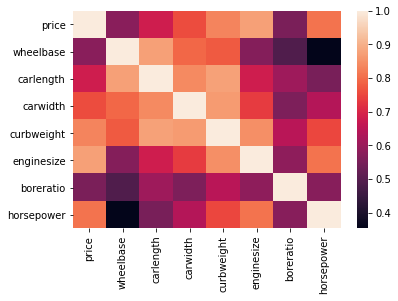

In [38]:
sns.heatmap(df.corr())

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   price           205 non-null    float64
 1   company         205 non-null    object 
 2   fueltype        205 non-null    object 
 3   aspiration      205 non-null    object 
 4   carbody         205 non-null    object 
 5   drivewheel      205 non-null    object 
 6   wheelbase       205 non-null    float64
 7   carlength       205 non-null    float64
 8   carwidth        205 non-null    float64
 9   curbweight      205 non-null    int64  
 10  enginetype      205 non-null    object 
 11  cylindernumber  205 non-null    object 
 12  enginesize      205 non-null    int64  
 13  boreratio       205 non-null    float64
 14  horsepower      205 non-null    int64  
dtypes: float64(5), int64(3), object(7)
memory usage: 24.1+ KB


In [40]:
object_columns = ['company', 'fueltype', 'aspiration', 'carbody', 'drivewheel', 'enginetype', 'cylindernumber']

In [54]:
df_not_object = df[[i for i in df.columns if i not in object_columns]]
df_object = df[object_columns]

In [55]:
df_not_object

,price,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower
0,13495.0,88.6,168.8,64.1,2548,130,3.47,111
1,16500.0,88.6,168.8,64.1,2548,130,3.47,111
2,16500.0,94.5,171.2,65.5,2823,152,2.68,154
3,13950.0,99.8,176.6,66.2,2337,109,3.19,102
4,17450.0,99.4,176.6,66.4,2824,136,3.19,115
...,...,...,...,...,...,...,...,...
200,16845.0,109.1,188.8,68.9,2952,141,3.78,114
201,19045.0,109.1,188.8,68.8,3049,141,3.78,160
202,21485.0,109.1,188.8,68.9,3012,173,3.58,134
203,22470.0,109.1,188.8,68.9,3217,145,3.01,106


In [56]:
df_object

,company,fueltype,aspiration,carbody,drivewheel,enginetype,cylindernumber
0,alfa-romero,gas,std,convertible,rwd,dohc,four
1,alfa-romero,gas,std,convertible,rwd,dohc,four
2,alfa-romero,gas,std,hatchback,rwd,ohcv,six
3,audi,gas,std,sedan,fwd,ohc,four
4,audi,gas,std,sedan,4wd,ohc,five
...,...,...,...,...,...,...,...
200,volvo,gas,std,sedan,rwd,ohc,four
201,volvo,gas,turbo,sedan,rwd,ohc,four
202,volvo,gas,std,sedan,rwd,ohcv,six
203,volvo,diesel,turbo,sedan,rwd,ohc,six


In [60]:
df_object_dummy = pd.get_dummies(data=df_object, drop_first=True)
df_object_dummy

,company_audi,company_bmw,company_buick,company_chevrolet,company_dodge,company_honda,company_isuzu,company_jaguar,company_mazda,company_mercury,...,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
201,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
202,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
203,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0


In [68]:
cars = pd.concat([df_not_object, df_object_dummy], axis=1)
cars

,price,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,company_audi,company_bmw,...,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two
0,13495.0,88.6,168.8,64.1,2548,130,3.47,111,0,0,...,0,0,0,0,0,1,0,0,0,0
1,16500.0,88.6,168.8,64.1,2548,130,3.47,111,0,0,...,0,0,0,0,0,1,0,0,0,0
2,16500.0,94.5,171.2,65.5,2823,152,2.68,154,0,0,...,0,0,1,0,0,0,1,0,0,0
3,13950.0,99.8,176.6,66.2,2337,109,3.19,102,1,0,...,1,0,0,0,0,1,0,0,0,0
4,17450.0,99.4,176.6,66.4,2824,136,3.19,115,1,0,...,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,16845.0,109.1,188.8,68.9,2952,141,3.78,114,0,0,...,1,0,0,0,0,1,0,0,0,0
201,19045.0,109.1,188.8,68.8,3049,141,3.78,160,0,0,...,1,0,0,0,0,1,0,0,0,0
202,21485.0,109.1,188.8,68.9,3012,173,3.58,134,0,0,...,0,0,1,0,0,0,1,0,0,0
203,22470.0,109.1,188.8,68.9,3217,145,3.01,106,0,0,...,1,0,0,0,0,0,1,0,0,0


In [69]:
import statsmodels.api as sm
import statsmodels.formula.api as smf 

In [73]:
# способ первый
# Y = одномерный массив с ЗП, X - массив со всеми нужными нам НП

Y = cars['price']
X = cars['horsepower']

X = sm.add_constant(X)  # добавить константу, чтобы был свободный член
model = sm.OLS(Y, X)  # говорим модели, что у нас ЗП, а что НП
results = model.fit()  # строим регрессионную прямую
print(results.summary())  # смотрим результат

# способ второй, потенциально более удобный

# results = smf.ols('Y ~ X1 + X2 + ... + Xn', data).fit()
# print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.653
Model:                            OLS   Adj. R-squared:                  0.651
Method:                 Least Squares   F-statistic:                     382.2
Date:                Thu, 10 Dec 2020   Prob (F-statistic):           1.48e-48
Time:                        13:17:16   Log-Likelihood:                -2024.0
No. Observations:                 205   AIC:                             4052.
Df Residuals:                     203   BIC:                             4059.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3721.7615    929.849     -4.003      0.0

In [75]:
Y = cars['price']
X = cars.drop(columns='price')

X = sm.add_constant(X)  # добавить константу, чтобы был свободный член
model = sm.OLS(Y, X)  # говорим модели, что у нас ЗП, а что НП
results = model.fit()  # строим регрессионную прямую
print(results.summary())  # смотрим результат

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     81.09
Date:                Thu, 10 Dec 2020   Prob (F-statistic):           4.86e-89
Time:                        13:21:29   Log-Likelihood:                -1804.2
No. Observations:                 205   AIC:                             3702.
Df Residuals:                     158   BIC:                             3858.
Df Model:                          46                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -3.472e+

In [95]:
company_variables = cars.columns[cars.columns.str.startswith('company_')]
company_variables

Index(['company_audi', 'company_bmw', 'company_buick', 'company_chevrolet',
       'company_dodge', 'company_honda', 'company_isuzu', 'company_jaguar',
       'company_mazda', 'company_mercury', 'company_mitsubishi',
       'company_nissan', 'company_peugeot', 'company_plymouth',
       'company_porsche', 'company_renault', 'company_saab', 'company_subaru',
       'company_toyota', 'company_volkswagen', 'company_volvo'],
      dtype='object')

In [96]:
company_variables = [i for i in cars.columns if i.startswith('company_')]
company_variables

['company_audi',
 'company_bmw',
 'company_buick',
 'company_chevrolet',
 'company_dodge',
 'company_honda',
 'company_isuzu',
 'company_jaguar',
 'company_mazda',
 'company_mercury',
 'company_mitsubishi',
 'company_nissan',
 'company_peugeot',
 'company_plymouth',
 'company_porsche',
 'company_renault',
 'company_saab',
 'company_subaru',
 'company_toyota',
 'company_volkswagen',
 'company_volvo']

In [98]:
Y = cars['price']
X = cars.drop(columns=company_variables + ['price'])

X = sm.add_constant(X)  # добавить константу, чтобы был свободный член
model = sm.OLS(Y, X)  # говорим модели, что у нас ЗП, а что НП
results = model.fit()  # строим регрессионную прямую
print(results.summary())  # смотрим результат

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     72.32
Date:                Thu, 10 Dec 2020   Prob (F-statistic):           9.86e-81
Time:                        15:52:18   Log-Likelihood:                -1881.6
No. Observations:                 205   AIC:                             3817.
Df Residuals:                     178   BIC:                             3907.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   -1.7e+